# パーセプトロン

In [13]:
import numpy as np

class Perceptron:
    def __init__(self, d, eta=0.001, epoch=100, max_err=10):
        """
        Parameters
        ----------
        d : 次元（変数の数）
        eta : 学習率
        epoch : エポック
        max_err : 許容する判定誤りの最大数
        """
        self.d = d
        self.eta = eta
        self.epoch = epoch
        self.max_err = max_err
        self.weight = np.zeros(d+1)  # 閾値を重みと見做す分、1つ増える

    def predict(self, x):
        """
        Parameters
        ----------
        x : 分類したいデータ（d次元ベクトル）
        """
        return 1 if np.dot(x, self.weight[:-1]) + self.weight[-1] > 0 else -1

    def fit(self, data, labels):
        """
        Parameters
        ----------
        data : 学習データの配列
        labels : 正解ラベルの配列
        """
        self.labels = labels
        self.data = np.append(data, np.array([[1.0] for _ in range(len(data))]), axis=1)
        for t in range(self.epoch):
            cnt_err = self.__cycle()
            if cnt_err <= self.max_err:
                break
        print('Converged in {} cycles.'.format(t+1))

    def __cycle(self):
        ids = np.array(range(len(self.data)))
        np.random.shuffle(ids)  # 毎回同じ順序でサンプルを使うことによる偏りを避けるためランダムソート
        cnt_err = 0
        for i in ids:
            label_eval = 1 if np.dot(self.data[i], self.weight) > 0 else -1
            if label_eval != self.labels[i]:
                cnt_err += 1
                for j in range(self.d + 1):
                    self.weight[j] = self.weight[j] + self.eta * (self.labels[i] - label_eval) * self.data[i][j]
        return cnt_err

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot(classifier, data, labels):
    colors = ['red', 'blue']
    x1max, x1min = np.max(data[:, 0]), np.min(data[:, 0])
    x2max, x2min = np.max(data[:, 1]), np.min(data[:, 1])
    scale_x1 = x1max - x1min
    scale_x2 = x2max - x2min
    x1max, x1min = x1max + (x1max-x1min)*0.05, x1min - (x1max-x1min)*0.05
    x2max, x2min = x2max + (x2max-x2min)*0.05, x2min - (x2max-x2min)*0.05
    resolution = scale_x1 / 100
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = np.array([classifier.predict(x) for x in np.array([xx1.ravel(), xx2.ravel()]).T])
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors[::-1]))
    
    data_of_each_label = [[], []]
    for d, l in zip(data, labels):
        if l == 1:
            data_of_each_label[0].append(d)
        else:
            data_of_each_label[1].append(d)
    for i in range(len(data_of_each_label)):
        plt.scatter(np.array(data_of_each_label[i])[:, 0], np.array(data_of_each_label[i])[:, 1], s=5, c=colors[i])
    plt.show()

Converged in 4 cycles.


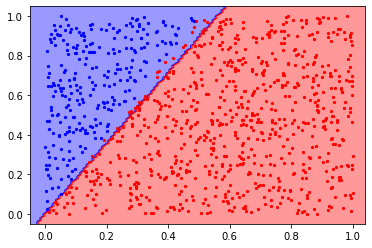

In [15]:
N = 1000
data = np.reshape(np.random.rand(2*N), (N, 2))
labels = np.array([1 if 2*x[0] - x[1] > 0 else -1 for x in data])
perceptron = Perceptron(2, max_err=N//100)
perceptron.fit(data, labels)
plot(perceptron, data, labels)


Converged in 25 cycles.


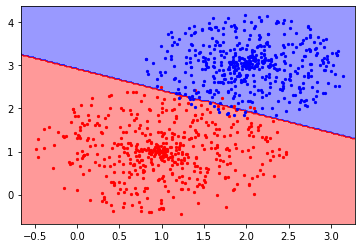

(1, -1)

In [16]:
N = 1000
c1 = [1, 1]
c2 = [2, 3]
r1 = 1.5*np.random.rand(N//2)
r2 = 1.2*np.random.rand(N//2)
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + c1[0], r1 * np.cos(theta1) + c1[1]]).T
data2 = np.array([r2 * np.sin(theta2) + c2[0], r2 * np.cos(theta2) + c2[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

perceptron = Perceptron(2, max_err=N//50)
perceptron.fit(data, labels)
plot(perceptron, data, labels)

perceptron.predict(data1[0]), perceptron.predict(data2[0])

In [19]:
data = np.array([
    [0, 1], [1, 2], [2, 3], [3, 4], [4, 5],
    [1, 0], [2, 1], [3, 2], [4, 3], [5, 4]
])
labels = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
perceptron = Perceptron(2, max_err=2)
perceptron.fit(data, labels)
print(perceptron.predict([1, 3]))
print(perceptron.predict([7, 2]))

Converged in 1 cycles.
1
-1


# ADALINE

In [10]:
import numpy as np

class Adaline:
    def __init__(self, d, eta=0.001, epoch=100, max_err=10):
        """
        Parameters
        ----------
        d : 次元（変数の数）
        eta : 学習率
        epoch : エポック
        max_err : 許容する判定誤りの最大数
        """
        self.d = d
        self.eta = eta
        self.epoch = epoch
        self.max_err = max_err
        self.weight = np.zeros(d+1)  # 閾値を重みと見做す分、1つ増える

    def predict(self, x):
        """
        Parameters
        ----------
        x : 分類したいデータ（d次元ベクトル）
        """
        return 1 if np.dot(x, self.weight[:-1]) + self.weight[-1] > 0 else -1

    def fit(self, data, labels):
        """
        Parameters
        ----------
        data :
        labels :
        """
        self.labels = labels
        self.data = np.append(data, np.array([[1.0] for _ in range(len(data))]), axis=1)
        for t in range(self.epoch):
            cnt_err = self.__cycle()
            if cnt_err <= self.max_err:
                break
        print('Converged in {} cycles.'.format(t+1))

    def __cycle(self):
        cnt_err = 0
        dw = np.zeros(len(self.weight))
        for i in range(len(self.data)):
            z = np.dot(self.data[i], self.weight)
            dw += (self.labels[i] - z) * self.data[i]
            if self.labels[i] < 0 <= z or z < 0 < self.labels[i]:
                cnt_err += 1
        dw *= self.eta
        self.weight += dw
        return cnt_err

Converged in 42 cycles.


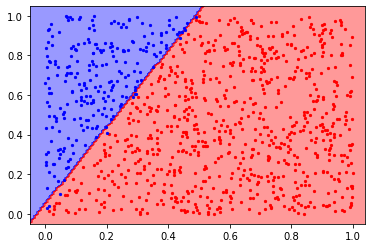

In [11]:
N = 1000
data = np.reshape(np.random.rand(2*N), (N, 2))
labels = np.array([1 if 2*x[0] - x[1] > 0 else -1 for x in data])

adaline = Adaline(2, max_err=N//100)
adaline.fit(data, labels)
plot(adaline, data, labels)

Converged in 320 cycles.


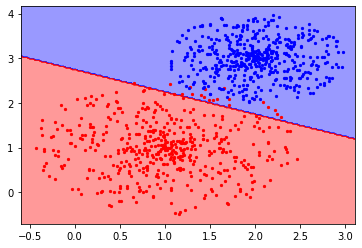

In [12]:
N = 1000
c1 = [1, 1]
c2 = [2, 3]
r1 = 1.5*np.random.rand(N//2)
r2 = 1.0*np.random.rand(N//2)
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + c1[0], r1 * np.cos(theta1) + c1[1]]).T
data2 = np.array([r2 * np.sin(theta2) + c2[0], r2 * np.cos(theta2) + c2[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

adaline = Adaline(2, max_err=N//50, eta=1e-4, epoch=500)
adaline.fit(data, labels)
plot(adaline, data, labels)

In [107]:
data = np.array([
    [0, 1], [1, 2], [2, 3], [3, 4], [4, 5],
    [1, 0], [2, 1], [3, 2], [4, 3], [5, 4]
])
labels = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

adaline = Adaline(2, max_err=N//100)
adaline.fit(data, labels)

print(adaline.predict([1, 3]))
# 1
print(adaline.predict([7, 2]))
# -1

Converged in 1 cycles.
1
-1


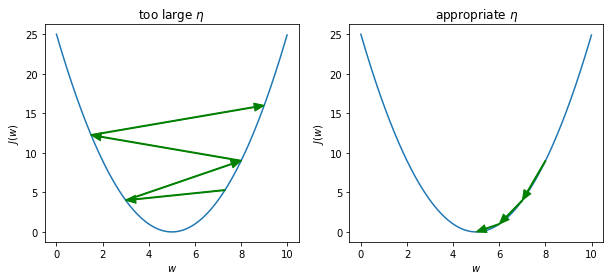

In [145]:
x = np.array(range(1000)) * 0.01
y = (x - 5)**2

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
axL.set_title('too large $\eta$')
axL.set_xlabel('$w$')
axL.set_ylabel('$J(w)$')
axL.plot(x, y)
axR.set_title('appropriate $\eta$')
axR.set_xlabel('$w$')
axR.set_ylabel('$J(w)$')
axR.plot(x, y)

axL.annotate('', xytext=[7.3,2.3*2.3], xy=[3,4],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))
axL.annotate('', xytext=[3,4], xy=[8,9],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))
axL.annotate('', xytext=[8,9], xy=[1.5,3.5*3.5],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))
axL.annotate('', xytext=[1.5,3.5*3.5], xy=[9, 16],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))

axR.annotate('', xytext=[8,9], xy=[7,4],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))
axR.annotate('', xytext=[7,4], xy=[6,1],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))
axR.annotate('', xytext=[6,1], xy=[5,0],
    arrowprops=dict(shrink=0, width=1, headwidth=8, 
        headlength=10, connectionstyle='arc3', facecolor='green', edgecolor='green'))

plt.show()